In [1]:
#importing libaries

In [1]:
import numpy as np
import scipy
import pandas as pd
import seaborn as sns
sns.set_style('white')
import math
import random
import sklearn
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [139]:
#importing datasets
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\Nwokochaui\Anaconda3\lib\site-packages\IPython\core\interactivesh

In [4]:
#Investigating the dataset

In [5]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [34]:
users.head()

,userID,Location,Age,age
0,1,"nyc, new york, usa",nan,nan
1,2,"stockton, california, usa",18.000,nan
2,3,"moscow, yukon territory, russia",nan,nan
3,4,"porto, v.n.gaia, portugal",17.000,nan
4,5,"farnborough, hants, united kingdom",nan,nan


In [35]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
#books.drop(['imageUrlS','imageUrlM','imageUrlL'],axis=1,inplace=True)

In [7]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [8]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
imageUrlS            object
imageUrlM            object
imageUrlL            object
dtype: object

In [9]:
#Checking for 0's and nans in the year of publication

In [10]:
zero_yr = books[books.yearOfPublication == 0].yearOfPublication.count()
nan_yr = books.yearOfPublication.isnull().sum()
print(f'There are {zero_yr} entries as \'0\', and {nan_yr} NaN entries in the Year of Publication field')

There are 3570 entries as '0', and 0 NaN entries in the Year of Publication field


In [11]:
# Replace all years of zero with NaN
books.yearOfPublication.replace(0, np.nan, inplace=True)

In [12]:
#The most frequent publishers
Most_publishers = books.publisher.value_counts()[:20]
print(f'The frequent publishers are:\n{Most_publishers}')

The frequent publishers are:
Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &amp; Schuster        2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Penguin USA                 2717
Harpercollins               2525
Fawcett Books               2258
Signet Book                 2070
Random House Inc            2045
St Martins Pr               1953
St. Martin's Press          1783
Tor Books                   1704
HarperCollins Publishers    1700
Zebra Books                 1694
Name: publisher, dtype: int64


In [13]:
Most_authors = books.bookAuthor.value_counts()[:10]
print(f'The most book authors in the books table are:\n{Most_authors}')

The most book authors in the books table are:
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: bookAuthor, dtype: int64


In [14]:
empty_string_publisher = books[books.publisher == ''].publisher.count()
nan_publisher = books.publisher.isnull().sum()
print(f'There are {empty_string_publisher} entries with empty strings, and {nan_publisher} NaN entries in the Publisher field')

There are 0 entries with empty strings, and 2 NaN entries in the Publisher field


In [15]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [141]:
userdf = users.head()
booksdf = books.head()
ratingsdf = ratings.head()

In [142]:
userdf.to_excel('usersample.xlsx', index=False)
booksdf.to_excel('booksample.xlsx', index=False)
ratingsdf.to_excel('ratingssample.xlsx', index=False)

In [16]:
uniq_users = users.userID.nunique()
all_users = users.userID.count()
print(f'the number of unique user_id entries: {uniq_users} | Total user_id entries: {all_users}')

the number of unique user_id entries: 278858 | Total user_id entries: 278858


In [17]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [18]:
#changing the age of user to a minimum of 5 and maximum of 100

In [19]:
users.loc[(users.Age<5) | (users.Age>100), 'age'] = np.nan

In [20]:
print(sorted(users.age.unique()))

[nan]


In [22]:
#visualising the age field

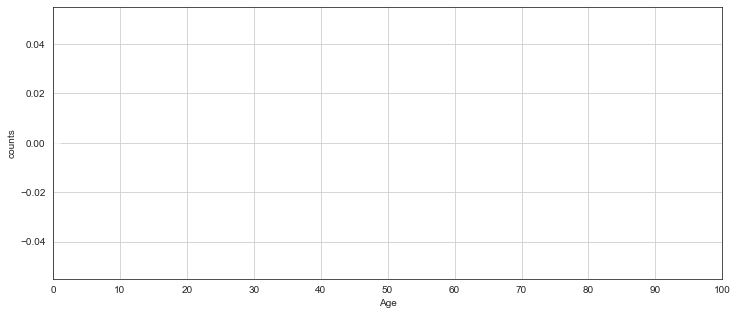

In [21]:
# First create a histogram of the Age field
ax = users.age.hist(bins=10, figsize=(12,5))
ax.set_xlabel('Age')
ax.set_ylabel('counts')
ax.set_xticks(range(0,110,10))
plt.show()

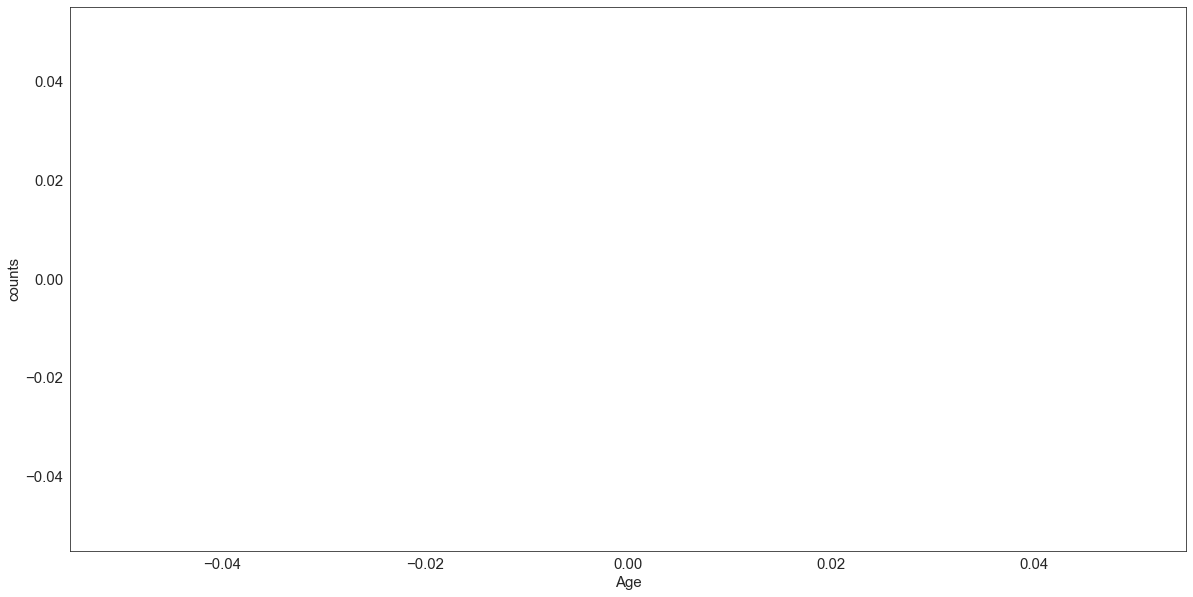

In [22]:
u = users.age.value_counts().sort_index()
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 15}) # Set larger plot font size
plt.bar(u.index, u.values)
plt.xlabel('Age')
plt.ylabel('counts')
plt.show()

In [23]:
# Additional data cleaning
# There was probably no check for valid ISBN...
ratings["ISBN"] = ratings["ISBN"].apply(lambda x: x.strip().strip("\'").strip("\\").strip('\"').strip("\#").strip("("))

In [24]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [25]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [36]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,276725,034545104X,0,Flesh Tones: A Novel
1,2313,034545104X,5,Flesh Tones: A Novel
2,6543,034545104X,0,Flesh Tones: A Novel
3,8680,034545104X,5,Flesh Tones: A Novel
4,10314,034545104X,9,Flesh Tones: A Novel


In [37]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['bookTitle'])['bookRating'].
     count().
     reset_index().
     rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']]
    )
book_ratingCount.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [38]:
#group by book titles and create a new column for total rating count.
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['bookTitle'])['bookRating'].
     count().
     reset_index().
     rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']]
    )
book_ratingCount.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [39]:
#The rating data with the total rating count
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
rating_with_totalRatingCount.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [40]:
#stastic rating count
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_ratingCount['totalRatingCount'].describe())

count   241071.000
mean         4.277
std         16.739
min          1.000
25%          1.000
50%          1.000
75%          3.000
max       2502.000
Name: totalRatingCount, dtype: float64


In [41]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,60
1,2313,034545104X,5,Flesh Tones: A Novel,60
2,6543,034545104X,0,Flesh Tones: A Novel,60
3,8680,034545104X,5,Flesh Tones: A Novel,60
4,10314,034545104X,9,Flesh Tones: A Novel,60


In [42]:
#filters to us and canada only to get recommendation based on locations

In [43]:
combined = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')

us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)
us_canada_user_rating.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location,age
0,276725,034545104X,0,Flesh Tones: A Novel,60,"tyler, texas, usa",nan
1,2313,034545104X,5,Flesh Tones: A Novel,60,"cincinnati, ohio, usa",nan
2,6543,034545104X,0,Flesh Tones: A Novel,60,"strafford, missouri, usa",nan
3,8680,034545104X,5,Flesh Tones: A Novel,60,"st. charles county, missouri, usa",nan
4,10314,034545104X,9,Flesh Tones: A Novel,60,"beaverton, oregon, usa",nan


In [44]:
#findin the nearest k neighbour

In [45]:
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [52]:
import pickle
knnPickle = open('knnpickle_file1locationCAUS', 'wb')
pickle.dump(model_knn, knnPickle)  


# loaded_model = pickle.load(open('knnpickle_file', 'rb'))
# result = loaded_model.predict(X_test) 

In [53]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape(1, -1),
n_neighbors=6)
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

2182
Recommendations for The Talisman:

1: Insomnia, with distance of 0.7625386585375853:
2: Desperation, with distance of 0.7673407722684594:
3: The Gunslinger (The Dark Tower, Book 1), with distance of 0.7902608005939022:
4: The Drawing of the Three (The Dark Tower, Book 2), with distance of 0.797459650321657:
5: The Waste Lands (The Dark Tower, Book 3), with distance of 0.815610361882113:


In [54]:
#colloborative filtering using matrix factorization
us_canada_user_rating_pivot2 = us_canada_user_rating.pivot(index = 'userID', columns = 'bookTitle', values = 'bookRating').fillna(0)
us_canada_user_rating_pivot2.head()

bookTitle,10 Lb. Penalty,16 Lighthouse Road,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,2061: Odyssey Three,24 Hours,2nd Chance,3rd Degree,...,YOU BELONG TO ME,Year of Wonders,You Belong To Me,You Shall Know Our Velocity,Young Wives,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",stardust
userID,,,,,,,,,,,,,,,,,,,,,
8,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
14,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
16,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
17,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [55]:
#we transpose the data

In [56]:
us_canada_user_rating_pivot2.shape

(40017, 2442)

In [57]:
X = us_canada_user_rating_pivot2.values.T
X.shape

(2442, 40017)

In [58]:
import sklearn
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(X)
matrix.shape

(2442, 12)

In [59]:
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)
corr = np.corrcoef(matrix)
corr.shape

(2442, 2442)

In [60]:
us_canada_book_title = us_canada_user_rating_pivot2.columns
us_canada_book_list = list(us_canada_book_title)
coffey_hands = us_canada_book_list.index("The Green Mile: Coffey's Hands (Green Mile Series)")
print(coffey_hands)

1906


In [61]:
corr_coffey_hands  = corr[coffey_hands]
list(us_canada_book_title[(corr_coffey_hands <= 0.9)])

['10 Lb. Penalty',
 '16 Lighthouse Road',
 '1984',
 '1st to Die: A Novel',
 '2010: Odyssey Two',
 '204 Rosewood Lane',
 '2061: Odyssey Three',
 '24 Hours',
 '2nd Chance',
 '3rd Degree',
 '4 Blondes',
 '50 Simple Things You Can Do to Save the Earth',
 '84 Charing Cross Road',
 'A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))',
 'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
 'A Bend in the Road',
 'A Case of Need',
 'A Child Called \\It\\": One Child\'s Courage to Survive"',
 'A Civil Action',
 'A Clockwork Orange (Norton Paperback Fiction)',
 'A Cold Heart (Alex Delaware Novels (Paperback))',
 'A Cold Heart: An Alex Delaware Novel',
 'A Confederacy of Dunces',
 'A Confederacy of Dunces (Evergreen Book)',
 'A Cry In The Night',
 "A Cup of Tea (Ballantine Reader's Circle)",
 'A Dangerous Fortune',
 'A Darkness More Than Night',
 'A Day Late and a Dollar Short',
 'A Density of Souls',
 'A Fine Balance',
 'A Game of T

In [62]:
merged_data = books.merge(ratings,on=["ISBN"])
merged_data.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL,userID,bookRating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [63]:
merged_data_users= merged_data.merge(users,on=["userID"])
merged_data_users.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL,userID,bookRating,Location,Age,age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.000,nan
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",nan,nan
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",nan,nan
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",nan,nan
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",nan,nan


In [64]:
merged_data_users.dtypes

ISBN                  object
bookTitle             object
bookAuthor            object
yearOfPublication     object
publisher             object
imageUrlS             object
imageUrlM             object
imageUrlL             object
userID                 int64
bookRating             int64
Location              object
Age                  float64
age                  float64
dtype: object

In [65]:
merged_data_users.drop(['Age','bookRating','yearOfPublication','age','ISBN','userID'],axis=1,inplace=True)

In [66]:
merged_data_users['Location'] = merged_data_users['Location'].fillna('')
merged_data_users['bookAuthor'] = merged_data_users['publisher'] + merged_data_users['Location']
merged_data_users['bookAuthor'] = merged_data_users['bookAuthor'].fillna('')

In [67]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(merged_data_users['bookAuthor'])

In [68]:
tfidf_matrix.shape

(1031140, 643430)

In [69]:
from sklearn import svm, datasets
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
# Set MKL interface layer to int64
# This must be set prior to importing the package
import os
os.environ["MKL_INTERFACE_LAYER"] = "ILP64"

In [52]:
# cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [70]:
# Group by and create basic additional users
user_groupby = ratings.groupby("userID")
book_groupby = ratings.groupby("ISBN")
average_user_rating = user_groupby["bookRating"].mean()
number_of_ratings_by_user = user_groupby["bookRating"].count()
average_book_rating = book_groupby["bookRating"].mean()
number_of_book_ratings = book_groupby["bookRating"].count()

average_user_rating.name = "avg_rating"
number_of_ratings_by_user.name = "N_ratings"
average_book_rating.name = "avg_rating"
number_of_book_ratings.name = "N_ratings"

In [71]:
# Merge with original dataframes
users = users.join(number_of_ratings_by_user, on="userID")
users = users.join(average_user_rating, on="userID")
books = books.join(number_of_book_ratings, on="ISBN")
books = books.join(average_book_rating, on="ISBN")

users["N_ratings"] = users["N_ratings"].fillna(0)
books["N_ratings"] = books["N_ratings"].fillna(0)

users["N_ratings"] = users["N_ratings"].astype("int64")
books["N_ratings"] = books["N_ratings"].astype("int64")

In [72]:
print(f"Out of {users.shape[0]} users only {users['N_ratings'].gt(0).sum(axis=0)} rated at least 1 book.")
print(f"Only {users['N_ratings'].gt(1).sum(axis=0)} rated at least 2 books.")
print(f"Only {users['N_ratings'].gt(9).sum(axis=0)} rated at least 10 books.")
print(f"Most active user rated {users['N_ratings'].max()} books.")
print()
print(f"Out of {books.shape[0]} books only {books['N_ratings'].gt(0).sum(axis=0)} are rated at least once.")
print(f"Only {books['N_ratings'].gt(1).sum(axis=0)} have at least 2 ratings.")
print(f"Only {books['N_ratings'].gt(9).sum(axis=0)} have at least 10 ratings.")
print(f"Most rated book was rated {books['N_ratings'].max()} times.")

Out of 278858 users only 105283 rated at least 1 book.
Only 46117 rated at least 2 books.
Only 13097 rated at least 10 books.
Most active user rated 13602 books.

Out of 271360 books only 270151 are rated at least once.
Only 124504 have at least 2 ratings.
Only 17479 have at least 10 ratings.
Most rated book was rated 2502 times.


In [73]:
users[users["N_ratings"].gt(0)].describe()

,userID,Age,age,N_ratings,avg_rating
count,105283.000,62107.000,0.000,105283.000,105283.000
mean,139474.739,35.485,nan,10.921,4.394
std,80574.738,14.742,nan,90.563,3.412
min,2.000,0.000,nan,1.000,0.000
25%,69376.000,25.000,nan,1.000,0.000
50%,139146.000,33.000,nan,1.000,4.600
75%,209643.500,45.000,nan,4.000,7.500
max,278854.000,244.000,nan,13602.000,10.000


In [74]:
# Get the most rated book in the dataset
books[books["N_ratings"] == books["N_ratings"].max()]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL,N_ratings,avg_rating
26,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,2502,1.020


In [75]:
# Get top 20 best rated books in our dataset
books.loc[books["N_ratings"] > 20].sort_values(by="avg_rating", ascending=False).head(20)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL,N_ratings,avg_rating
3028,1844262553,Free,Paul Vincent,2003,Upfront Publishing,http://images.amazon.com/images/P/1844262553.0...,http://images.amazon.com/images/P/1844262553.0...,http://images.amazon.com/images/P/1844262553.0...,54,7.963
27556,8445071416,El Hobbit,J. R. R. Tolkien,1991,Minotauro,http://images.amazon.com/images/P/8445071416.0...,http://images.amazon.com/images/P/8445071416.0...,http://images.amazon.com/images/P/8445071416.0...,23,7.478
1101,0060256672,Where the Sidewalk Ends : Poems and Drawings,Shel Silverstein,1974,HarperCollins,http://images.amazon.com/images/P/0060256672.0...,http://images.amazon.com/images/P/0060256672.0...,http://images.amazon.com/images/P/0060256672.0...,33,7.121
16190,0060248025,Falling Up,Shel Silverstein,1996,HarperCollins,http://images.amazon.com/images/P/0060248025.0...,http://images.amazon.com/images/P/0060248025.0...,http://images.amazon.com/images/P/0060248025.0...,38,6.921
1763,0395177111,The Hobbit (Leatherette Collector's Edition),J. R. R. Tolkien,1973,Houghton Mifflin Company,http://images.amazon.com/images/P/0395177111.0...,http://images.amazon.com/images/P/0395177111.0...,http://images.amazon.com/images/P/0395177111.0...,24,6.792
10287,0553274325,Johnny Got His Gun,Dalton Trumbo,1983,Bantam Books,http://images.amazon.com/images/P/0553274325.0...,http://images.amazon.com/images/P/0553274325.0...,http://images.amazon.com/images/P/0553274325.0...,32,6.750
15178,0836221362,It's A Magical World: A Calvin and Hobbes Coll...,Bill Watterson,1996,Andrews McMeel Publishing,http://images.amazon.com/images/P/0836221362.0...,http://images.amazon.com/images/P/0836221362.0...,http://images.amazon.com/images/P/0836221362.0...,28,6.643
5432,0439064864,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439064864.0...,http://images.amazon.com/images/P/0439064864.0...,http://images.amazon.com/images/P/0439064864.0...,170,6.612
5431,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,194,6.541
21545,1563890119,"Preludes and Nocturnes (Sandman, Book 1)",Neil Gaiman,1993,DC Comics,http://images.amazon.com/images/P/1563890119.0...,http://images.amazon.com/images/P/1563890119.0...,http://images.amazon.com/images/P/1563890119.0...,27,6.481


In [76]:
# Get all Harry Potter books and editions written by Rowling
books[books["bookTitle"].str.contains("Harry Potter") & books["bookAuthor"].str.contains("Rowling")]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL,N_ratings,avg_rating
2143,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,http://images.amazon.com/images/P/059035342X.0...,571,4.900
2809,0590353403,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,168,6.363
3459,0439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,351,4.729
3839,0439136350,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,197,6.467
5431,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,194,6.541
...,...,...,...,...,...,...,...,...,...,...
234611,0439294827,Harry Potter and the Sorcerer's Stone: A Delux...,J. K. Rowling,2001,Scholastic,http://images.amazon.com/images/P/0439294827.0...,http://images.amazon.com/images/P/0439294827.0...,http://images.amazon.com/images/P/0439294827.0...,2,9.000
237863,3895849618,Harry Potter und der Gefangene von Askaban. So...,Joanne K. Rowling,2002,Dhv der HÃ¶rverlag,http://images.amazon.com/images/P/3895849618.0...,http://images.amazon.com/images/P/3895849618.0...,http://images.amazon.com/images/P/3895849618.0...,1,7.000
251233,847888663X,Harry Potter y El Caliz de Fuego,J. K. Rowling,2001,Lidiun,http://images.amazon.com/images/P/847888663X.0...,http://images.amazon.com/images/P/847888663X.0...,http://images.amazon.com/images/P/847888663X.0...,0,nan
257263,043955490X,Harry Potter and the Goblet of Fire (Harry Pot...,J. K. Rowling,2003,Arthur A. Levine Books,http://images.amazon.com/images/P/043955490X.0...,http://images.amazon.com/images/P/043955490X.0...,http://images.amazon.com/images/P/043955490X.0...,1,10.000


In [77]:
ratings["bookRating"] = ratings["bookRating"].astype("int8")

In [78]:
pd_matrix = pd.merge(books.loc[books["N_ratings"] > 20, "ISBN"], ratings, how="left", left_on="ISBN", right_on="ISBN").drop_duplicates()

In [79]:
pd_matrix

,ISBN,userID,bookRating
0,0399135782,8,0
1,0399135782,11676,9
2,0399135782,29526,9
3,0399135782,36836,0
4,0399135782,46398,9
...,...,...,...
377631,0152012397,240700,7
377632,0152012397,241078,8
377633,0152012397,256167,8
377634,0152012397,259286,8


In [80]:
# Reshape so that ISBN is row index, User-ID is column index and values are ratings
pd_matrix = pd_matrix.pivot(index='ISBN', columns='userID', values='bookRating').fillna(0).astype("int8")

In [81]:
pd_matrix

userID,8,9,10,14,16,17,19,26,32,39,...,278831,278832,278836,278838,278843,278844,278846,278849,278851,278854
ISBN,,,,,,,,,,,,,,,,,,,,,
000649840X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0006547834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0006550576,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0006550789,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0007110928,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8845205118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8845247414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
884590184X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# Change to sparse matrix if we didn't have enough memory
matrix = csr_matrix(pd_matrix.values)

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors

In [84]:
# Create a model
N_predicted_neighbours = 11
KNN = NearestNeighbors(metric='cosine', n_neighbors=N_predicted_neighbours, n_jobs=-1)

In [85]:
# Fit the model
KNN.fit(matrix)

NearestNeighbors(metric='cosine', n_jobs=-1, n_neighbors=11)

In [86]:
NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                 radius=1.0)

NearestNeighbors(metric='cosine', n_jobs=-1, n_neighbors=11)

In [87]:
knnPickle2 = open('knnpickle_file2indexoflikedbook', 'wb') 
pickle.dump(KNN, knnPickle)  

# # load the model from disk
# loaded_model = pickle.load(open('knnpickle_file', 'rb'))
# result = loaded_model.predict(X_test) 


In [88]:
# Predict
distances, indices = KNN.kneighbors(matrix)

# Note that we do not have to split the data to train, valid and test, as we only need to compute distances between current data

In [89]:
print("Index of first Harry Potter book is:", np.where(pd_matrix.index=="059035342X")[0][0])

Index of first Harry Potter book is: 4865


In [92]:
print("Index of book is:", np.where(pd_matrix.index=="884590184X")[0][0])

Index of book is: 6860


In [71]:
selected_index = 4865

In [93]:
selected_index2 = 6860

In [72]:
# Just check it once again
books.loc[books["ISBN"] == pd_matrix.index[selected_index], "bookTitle"].values[0]

"Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))"

In [94]:
# Just check it once again
books.loc[books["ISBN"] == pd_matrix.index[selected_index2], "bookTitle"].values[0]

'Siddharta Romanzo Versione Di M Mila'

In [81]:
# Predictions

print(f"Because you liked {books.loc[books['ISBN'] == pd_matrix.index[indices[4865][0]], 'bookTitle'].values[0]} you may like:")

for i in range(1, N_predicted_neighbours):
    print(f"{books.loc[books['ISBN'] == pd_matrix.index[indices[4865][i]], 'bookTitle'].values[0]} with distance {distances[4865][i]:.3f}.")

Because you liked Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)) you may like:

Harry Potter and the Chamber of Secrets (Book 2) with distance 0.701.
Harry Potter and the Prisoner of Azkaban (Book 3) with distance 0.760.
Harry Potter and the Goblet of Fire (Book 4) with distance 0.828.
Harry Potter and the Goblet of Fire (Book 4) with distance 0.838.
Harry Potter and the Order of the Phoenix (Book 5) with distance 0.852.
Harry Potter and the Prisoner of Azkaban (Book 3) with distance 0.869.
Harry Potter and the Chamber of Secrets (Book 2) with distance 0.875.
The Lost King (Star of the Guardians, Vol 1) with distance 0.902.
Fried Green Tomatoes at the Whistle Stop Cafe with distance 0.904.
Love Story with distance 0.911.


In [95]:
# Predictions

print(f"Because you liked {books.loc[books['ISBN'] == pd_matrix.index[indices[6860][0]], 'bookTitle'].values[0]} you may like:")

for i in range(1, N_predicted_neighbours):
    print(f"{books.loc[books['ISBN'] == pd_matrix.index[indices[6860][i]], 'bookTitle'].values[0]} with distance {distances[6860][i]:.3f}.")

Because you liked Siddharta Romanzo Versione Di M Mila you may like:
Il Piccolo Principe with distance 0.899.
The Flanders Panel with distance 1.000.
The Story of B with distance 1.000.
Peace Is Every Step: The Path of Mindfulness in Everyday Life with distance 1.000.
The Fifth Sacred Thing with distance 1.000.
Ishmael: An Adventure of the Mind and Spirit with distance 1.000.
Another Roadside Attraction with distance 1.000.
Half Asleep in Frog Pajamas with distance 1.000.
Fierce Invalids Home from Hot Climates with distance 1.000.
A Canticle for Leibowitz (Bantam Spectra Book) with distance 1.000.


In [96]:
def recommend_similar_book(ISBN, indices, ratings_matrix, books_table, N_recommendations=1, distances=None):
    """
    Recommends a book title.
Parameters
    ----------
    ISBN: str
        ISBN of a book a user liked
    indices: np.array
        indices of ratings_matrix as predicted by KNN
    ratings_matrix: pd.DataFrame
        user-book-rating matrix with ratings as values
    N_recommendations: int (default 1)
        How many books to recommend?
    distances: np.array
        How distant are books from each other by KNN?
    """
    # TODO: This should be rather split in separate variables, this reads terribly
    print(f"Because you liked {books_table.loc[books_table['ISBN'] == ratings_matrix.index[indices[ISBN][0]], 'bookTitle'].values[0]} you may like:")
    print()
    for i in range(1, 1+N_recommendations):
        if distances:
            print(f"{books_table.loc[books_table['ISBN'] == ratings_matrix.index[indices[ISBN][i]], 'bookTitle'].values[0]} with distance {distances[isbn][i]:.3f}.")
        else:
            print(f"{books_table.loc[books_table['ISBN'] == ratings_matrix.index[indices[ISBN][i]], 'bookTitle'].values[0]}.")

In [97]:
recommend_similar_book(4865, indices, pd_matrix, books)

Because you liked Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)) you may like:

Harry Potter and the Chamber of Secrets (Book 2).


In [100]:
recommend_similar_book(6800, indices, pd_matrix, books)

Because you liked Bridget Jones. Am Rande des Wahnsinns. you may like:

Das Superwieb.


In [101]:
harry_potter_isbns = books.loc[books["bookTitle"].str.contains("Harry Potter") & books["bookAuthor"].str.contains("Rowling"), "ISBN"].values
harry_potter_ratings = ratings.loc[ratings["ISBN"].isin(harry_potter_isbns)]

In [102]:
# Group by and create new features
user_groupby = harry_potter_ratings.groupby("userID")
average_user_rating = user_groupby["bookRating"].mean()
number_of_ratings_by_user = user_groupby["bookRating"].count()

average_user_rating.name = "HP_avg_rating"
number_of_ratings_by_user.name = "HP_N_ratings"

In [103]:
# Merge with the main dataframe
users = users.join(number_of_ratings_by_user, on="userID")
users = users.join(average_user_rating, on="userID")

users["N_ratings"] = users["N_ratings"].fillna(0)

users["N_ratings"] = users["N_ratings"].astype("int64")

In [104]:
# Get some statistics for those users who have read at least one book from the HP series
users.loc[users["HP_N_ratings"].gt(0)].describe()

,userID,Age,age,N_ratings,avg_rating,HP_N_ratings,HP_avg_rating
count,1592.000,1183.000,0.000,1592.000,1592.000,1592.000,1592.000
mean,139916.126,32.601,nan,198.943,3.927,1.864,5.092
std,80450.823,13.880,nan,573.540,2.711,1.449,4.235
min,254.000,0.000,nan,1.000,0.000,1.000,0.000
25%,72361.500,24.000,nan,7.000,1.809,1.000,0.000
50%,137390.500,31.000,nan,38.000,3.493,1.000,6.200
75%,209537.000,38.000,nan,158.250,5.667,2.000,9.000
max,278843.000,201.000,nan,13602.000,10.000,17.000,10.000


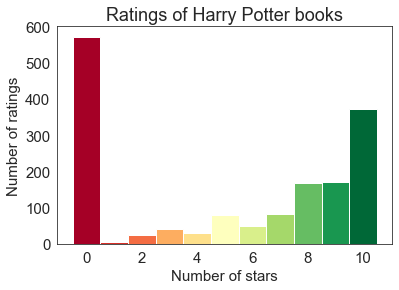

In [105]:
plt.figure()
# sns.distplot(users.loc[users["HP_N_ratings"].gt(0)]["HP_avg_rating"], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
bins = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]) - 0.5
n, bins, patches = plt.hist(users.loc[users["HP_N_ratings"].gt(0), "HP_avg_rating"], bins=bins)
cm = plt.cm.get_cmap('RdYlGn')
bin_centers = 0.5 * (bins[:-1] + bins[1:])
# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
plt.title("Ratings of Harry Potter books")
plt.xlabel("Number of stars")
plt.ylabel("Number of ratings")
plt.show()

In [108]:
# Get users who read seven books of the series
users.loc[users["HP_N_ratings"]==7]

# Note that this selection does not have to mean, they have read all parts of the series, just that they rated seven editions.
# Nevertheless, as first testing data, it is probably OK.

,userID,Location,Age,age,N_ratings,avg_rating,HP_N_ratings,HP_avg_rating
253,254,"minneapolis, minnesota, usa",24.000,nan,314,1.436,7.000,7.714
28522,28523,"springfield, missouri, usa",24.000,nan,397,1.224,7.000,4.286
30734,30735,"corvallis, oregon, usa",nan,nan,284,5.887,7.000,9.571
88732,88733,"houston, texas, usa",nan,nan,1158,3.396,7.000,9.429
175002,175003,"round rock, texas, usa",33.000,nan,1670,0.204,7.000,10.000
185232,185233,"winnemucca, nevada, usa",31.000,nan,2448,1.525,7.000,1.429
203074,203075,"huntington beach, california, usa",23.000,nan,161,2.652,7.000,8.429
211425,211426,"pueblo, colorado, usa",24.000,nan,978,1.003,7.000,4.286


In [109]:
# Transform User-ID to the index in our user-book-rating matrix
selected_matrix_indices = [pd_matrix.columns.get_loc(userID) for userID in users.loc[users["HP_N_ratings"]==7].sort_values(by="HP_avg_rating", ascending=False)["userID"].values]

In [110]:
KNN3 = NearestNeighbors(metric='cosine', n_neighbors=8, n_jobs=-1)

In [112]:
KNN3.fit(matrix.T[np.ix_(selected_matrix_indices)])

NearestNeighbors(metric='cosine', n_jobs=-1, n_neighbors=8)

In [113]:
knnPickle3 = open('knnpickle_file3indexsimilaruser1', 'wb') 
pickle.dump(KNN3, knnPickle3)  

# # load the model from disk
# loaded_model = pickle.load(open('knnpickle_file', 'rb'))
# result = loaded_model.predict(X_test) 

In [114]:
distances3, indices3 = KNN3.kneighbors(matrix.T[np.ix_(selected_matrix_indices)])

In [115]:
ind = np.argsort(indices3, axis=1)

In [116]:
sorted_distances = np.take_along_axis(distances3, ind, axis=1)

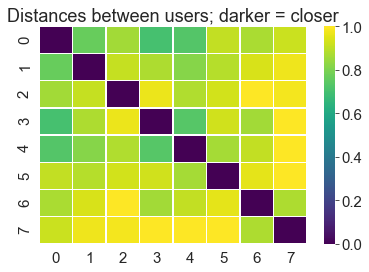

In [117]:
plt.figure()
ax = sns.heatmap(sorted_distances, linewidth=0.5, cmap="viridis")
plt.title("Distances between users; darker = closer")
plt.show()

In [118]:
# Create a model
KNN2 = NearestNeighbors(metric='cosine', n_neighbors=20, n_jobs=-1)

In [119]:
# Fit
KNN2.fit(matrix.T)

NearestNeighbors(metric='cosine', n_jobs=-1, n_neighbors=20)

In [120]:
knnPickle4 = open('knnpickle_file3indexsimilaruser2', 'wb') 
pickle.dump(KNN2, knnPickle4)  

# # load the model from disk
# loaded_model = pickle.load(open('knnpickle_file', 'rb'))
# result = loaded_model.predict(X_test) 

In [121]:
# Predict
distances2, indices2 = KNN2.kneighbors(matrix.T)

In [97]:
# Transform User-ID to the index in our user-book-rating matrix
pd_matrix.columns.get_loc(175003)

34620

In [122]:
# Get most similar users
indices2[34620]

array([34620, 50133, 45485, 54490, 54030, 21293, 47528, 11514, 37370,
       50365, 48620, 42004, 36599,  1180, 16868, 33699, 33372, 37530,
         876, 36099], dtype=int64)

In [123]:
# Transform back and get User-ID of nearest neighbor
pd_matrix.columns[50133]

252829

In [124]:
users.loc[users["userID"] == 252829]

,userID,Location,Age,age,N_ratings,avg_rating,HP_N_ratings,HP_avg_rating
252828,252829,"sierra vista, arizona, usa",18.000,nan,10,10.000,9.000,10.000


In [125]:
def recommend_favourite_book_of_similar_user(userID, indices, ratings_matrix, users_table, books_table, ratings_table, N_recommendations=1, distances=None):
    """
    Recommends a book title based on favourite books of ten most similar users.
    
    The order of books is following:
    Take the most similar user, sort his books by rating,
    exclude everything the current predicted user already read.
    Output books one by one.
    If there is only a few books from the most similar user and
    we run out of books, take next similar user and output
    his favorite books in a similar fashion.
    
    Parameters
    ----------
    userID: int
        ID of a user we want a recommendation for
    indices: np.array
        indices of ratings_matrix as predicted by KNN
    ratings_matrix: pd.DataFrame
        user-book-rating matrix with ratings as values
    users_table: pd.DataFrame
        Information about users
    books_table: pd.DataFrame
        Information about books
    ratings_table: pd.DataFrame
        Information about ratings
    N_recommendations: int (default 1)
        How many books to recommend?
    distances: np.array
     How distant are books from each other by KNN?
    """
    selected_index = ratings_matrix.columns.get_loc(userID)
    already_read_book_isbns = list(ratings_table.loc[ratings_table["userID"] == userID, "ISBN"].values)
    not_read_books = ratings_table.loc[~ratings_table["ISBN"].isin(already_read_book_isbns)]
    books_to_recommend = list()
    for i in range(1,10):
        similar_user_index = indices[selected_index][i]
        similar_user_ID = ratings_matrix.columns[similar_user_index]
        possible_to_recommend = not_read_books.loc[not_read_books["userID"] == similar_user_ID]
        possible_to_recommend = possible_to_recommend.sort_values(by="bookRating", ascending=False)
        for a, row in possible_to_recommend.iterrows():
            books_to_recommend.append(books_table.loc[books["ISBN"] == row["ISBN"], "bookTitle"].values[0])
            if len(books_to_recommend) > N_recommendations-1:
                break
        if len(books_to_recommend) > N_recommendations-1:
            break
    print(f"Based on users who like similar books as you, you may like:")
    print()
    for book_name in books_to_recommend:
        print(book_name)

In [126]:

recommend_favourite_book_of_similar_user(175003, indices2, pd_matrix, users, books, ratings, N_recommendations=3, distances=distances2)

Based on users who like similar books as you, you may like:

Harry Potter and the Chamber of Secrets (Book 2)
Harry Potter and the Prisoner of Azkaban (Book 3)
Ultimate Unofficial Guide to the Mysteries of Harry Potter


In [129]:
#recommendation based on rating counts

In [130]:
rating_count = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
rating_count.sort_values('bookRating', ascending=False).head()

,bookRating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


In [131]:
most_rated_books = pd.DataFrame(['0971880107', '0316666343', '0385504209', '0060928336', '0312195516'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL,N_ratings,avg_rating
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,2502,1.020
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,1295,4.469
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,883,4.652
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,732,3.448
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,723,4.335


In [132]:
#Recommendation based on correlation

In [133]:
average_rating = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,bookRating,ratingCount
ISBN,,
0971880107,1.020,2502
0316666343,4.469,1295
0385504209,4.652,883
0060928336,3.448,732
0312195516,4.335,723
